In [ ]:
import pandas as pd
import numpy as np
import string
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the datasets with raw string paths
true_df = pd.read_csv('/content/drive/MyDrive/Datasets/True.csv')
false_df = pd.read_csv('/content/drive/MyDrive/Datasets/False.csv')

# Add labels to indicate real and fake news
true_df['label'] = 1
false_df['label'] = 0

# Concatenate both datasets
data = pd.concat([true_df, false_df], ignore_index=True)

In [ ]:
#True dataset
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
#False dataset
false_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
# Ensure title and text are strings
data['title'] = data['title'].astype(str).str.lower()
data['text'] = data['text'].astype(str).str.lower()

In [ ]:
# Combine title and text
data['combined'] = data['title'] + ' ' + data['text']

# Split BEFORE TF-IDF to prevent data leakage
X_raw_train, X_raw_test, y_train, y_test = train_test_split(
    data['combined'],
    data['label'],
    test_size=0.2,
    random_state=42,
    stratify=data['label']  # preserves class distribution
)

# TF-IDF Vectorizer with built-in stopword removal and bigram support
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2)  # unigrams + bigrams
)

In [ ]:
# Fit on training data only, transform both train and test
X_train = tfidf_vectorizer.fit_transform(X_raw_train)
X_test = tfidf_vectorizer.transform(X_raw_test)

# Show dataset shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (35918, 5000)
X_test shape: (8980, 5000)
y_train shape: (35918,)
y_test shape: (8980,)


Accuracy: 0.95
Naive Bayes Accuracy: 0.9451002227171492
Naive Bayes Confusion Matrix:
 [[4440  256]
 [ 237 4047]]
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      4696
           1       0.94      0.94      0.94      4284

    accuracy                           0.95      8980
   macro avg       0.94      0.95      0.94      8980
weighted avg       0.95      0.95      0.95      8980



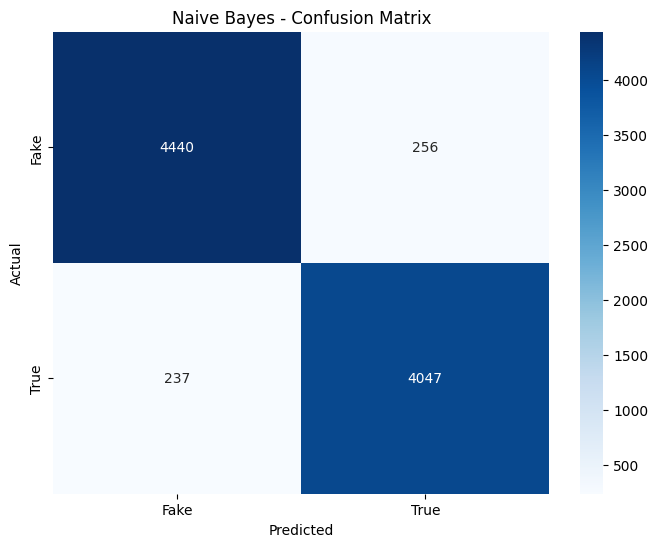

In [ ]:

# Define and train the Multinomial Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Evaluate the Multinomial Naive Bayes model
def evaluate_naive_bayes(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    return accuracy, confusion, classification_rep

# Evaluate Naive Bayes
nb_accuracy, nb_confusion, nb_classification = evaluate_naive_bayes(naive_bayes_model, X_test, y_test)

# Format and display the metrics
print(f"Accuracy: {nb_accuracy:.2f}")

print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Confusion Matrix:\n", nb_confusion)
print("Naive Bayes Classification Report:\n", nb_classification)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nb_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes - Confusion Matrix')
plt.show()

Accuracy: 1.00
Decision Tree Accuracy: 0.9957683741648107
Decision Tree Confusion Matrix:
 [[4681   15]
 [  23 4261]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      0.99      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



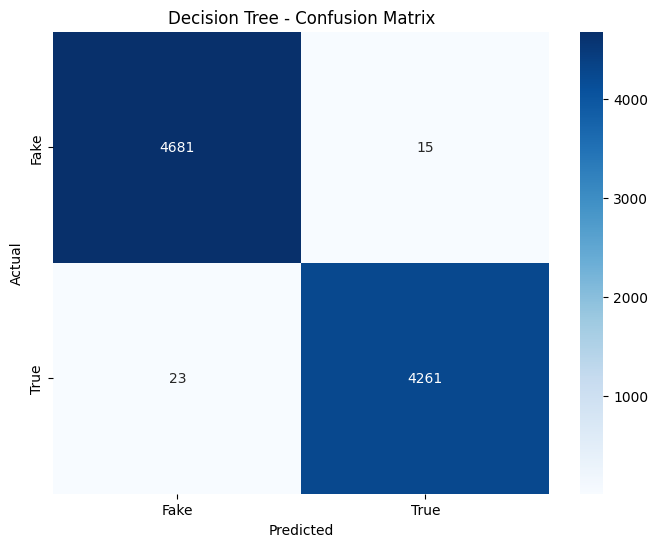

In [ ]:
# Define and train the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Evaluate the Decision Tree model
def evaluate_decision_tree(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return accuracy, confusion, classification_rep

# Evaluate Decision Tree
dt_accuracy, dt_confusion, dt_classification = evaluate_decision_tree(decision_tree, X_test, y_test)

# Format and display the metrics
print(f"Accuracy: {dt_accuracy:.2f}")
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Confusion Matrix:\n", dt_confusion)
print("Decision Tree Classification Report:\n", dt_classification)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

Accuracy: 1.00
Passive Aggressive Classifier Accuracy: 0.9951002227171493
Passive Aggressive Classifier Confusion Matrix:
 [[4674   22]
 [  22 4262]]
Passive Aggressive Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       0.99      0.99      0.99      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



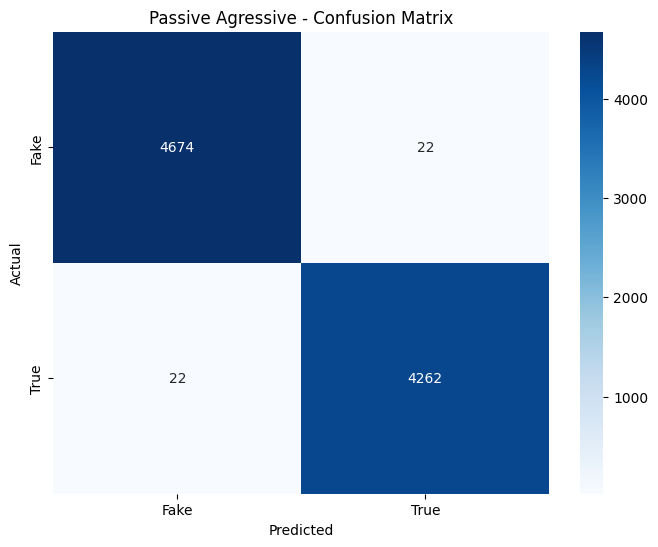

In [ ]:
# Define and train the Passive Aggressive Classifier model
passive_aggressive = PassiveAggressiveClassifier()
passive_aggressive.fit(X_train, y_train)

# Evaluate the Passive Aggressive Classifier model
def evaluate_passive_aggressive(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return accuracy, confusion, classification_rep

# Evaluate Passive Aggressive Classifier
pa_accuracy, pa_confusion, pa_classification = evaluate_passive_aggressive(passive_aggressive, X_test, y_test)

# Format and display the metrics
print(f"Accuracy: {pa_accuracy:.2f}")
print("Passive Aggressive Classifier Accuracy:", pa_accuracy)
print("Passive Aggressive Classifier Confusion Matrix:\n", pa_confusion)
print("Passive Aggressive Classifier Classification Report:\n", pa_classification)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pa_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Passive Agressive - Confusion Matrix')
plt.show()

Accuracy: 1.00
Random Forest Accuracy: 0.9987750556792873
Random Forest Confusion Matrix:
 [[4691    5]
 [   6 4278]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



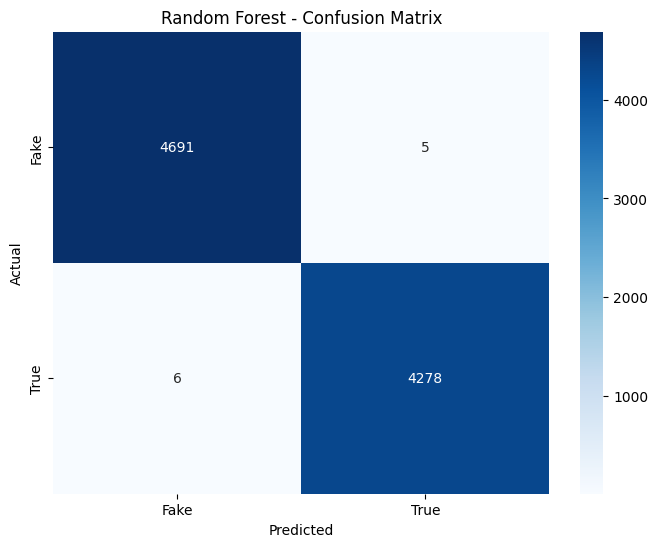

In [ ]:
# Define and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Evaluate the Random Forest model
def evaluate_random_forest(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return accuracy, confusion, classification_rep

# Evaluate Random Forest
rf_accuracy, rf_confusion, rf_classification = evaluate_random_forest(random_forest, X_test, y_test)

# Format and display the metrics
print(f"Accuracy: {rf_accuracy:.2f}")

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_confusion)
print("Random Forest Classification Report:\n", rf_classification)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()

Accuracy: 0.99
Logistic Regression Accuracy: 0.9889755011135858
Logistic Regression Confusion Matrix:
 [[4631   65]
 [  34 4250]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



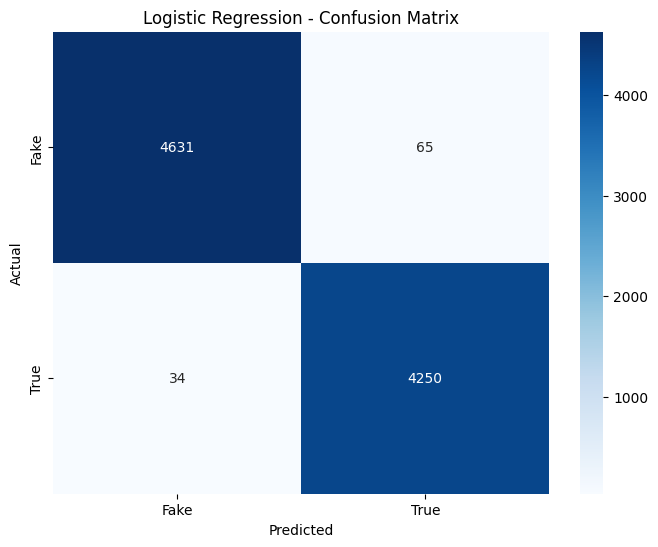

In [ ]:
# Define and train the Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Evaluate the Logistic Regression model
def evaluate_logistic_regression(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return accuracy, confusion, classification_rep

# Evaluate Logistic Regression
lr_accuracy, lr_confusion, lr_classification = evaluate_logistic_regression(logistic_regression, X_test, y_test)

# Format and display the metrics
print(f"Accuracy: {lr_accuracy:.2f}")

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Confusion Matrix:\n", lr_confusion)
print("Logistic Regression Classification Report:\n", lr_classification)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lr_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

In [ ]:
# Testing and evaluating Logistic Regression
lr_test_predictions = logistic_regression.predict(X_test)
lr_test_precision = precision_score(y_test, lr_test_predictions)
lr_test_recall = recall_score(y_test, lr_test_predictions)
lr_test_f1 = f1_score(y_test, lr_test_predictions)

# Print precision, recall, and F1 score for Logistic Regression
print("Logistic Regression Test Precision:", lr_test_precision)
print("Logistic Regression Test Recall:", lr_test_recall)
print("Logistic Regression Test F1 Score:", lr_test_f1)

# Repeat the testing and evaluation for the other classifiers (Random Forest, Passive Aggressive, Decision Tree)

Logistic Regression Test Precision: 0.984936268829664
Logistic Regression Test Recall: 0.9920634920634921
Logistic Regression Test F1 Score: 0.988487033375974


In [ ]:
# Testing the Random Forest model on the test data
rf_test_predictions = random_forest.predict(X_test)

# Evaluate Random Forest on the test data
rf_test_precision = precision_score(y_test, rf_test_predictions)
rf_test_recall = recall_score(y_test, rf_test_predictions)
rf_test_f1 = f1_score(y_test, rf_test_predictions)

# Print precision, recall, and F1 score for Random Forest
print("Random Forest Test Precision:", rf_test_precision)
print("Random Forest Test Recall:", rf_test_recall)
print("Random Forest Test F1 Score:", rf_test_f1)

Random Forest Test Precision: 0.998832593976185
Random Forest Test Recall: 0.9985994397759104
Random Forest Test F1 Score: 0.9987160032683553


In [ ]:
# Testing the Passive Aggressive Classifier model on the test data
pa_test_predictions = passive_aggressive.predict(X_test)

# Evaluate Passive Aggressive Classifier on the test data
pa_test_precision = precision_score(y_test, pa_test_predictions)
pa_test_recall = recall_score(y_test, pa_test_predictions)
pa_test_f1 = f1_score(y_test, pa_test_predictions)

# Print precision, recall, and F1 score for Passive Aggressive Classifier
print("Passive Aggressive Classifier Test Precision:", pa_test_precision)
print("Passive Aggressive Classifier Test Recall:", pa_test_recall)
print("Passive Aggressive Classifier Test F1 Score:", pa_test_f1)

Passive Aggressive Classifier Test Precision: 0.9948646125116714
Passive Aggressive Classifier Test Recall: 0.9948646125116714
Passive Aggressive Classifier Test F1 Score: 0.9948646125116714


In [ ]:
# Testing the Decision Tree model on the test data
dt_test_predictions = decision_tree.predict(X_test)

# Evaluate Decision Tree on the test data
dt_test_precision = precision_score(y_test, dt_test_predictions)
dt_test_recall = recall_score(y_test, dt_test_predictions)
dt_test_f1 = f1_score(y_test, dt_test_predictions)

# Print precision, recall, and F1 score for Decision Tree
print("Decision Tree Test Precision:", dt_test_precision)
print("Decision Tree Test Recall:", dt_test_recall)
print("Decision Tree Test F1 Score:", dt_test_f1)

Decision Tree Test Precision: 0.9964920486435921
Decision Tree Test Recall: 0.9946311858076564
Decision Tree Test F1 Score: 0.9955607476635514


In [ ]:
# Testing and evaluating Multinomial Naive Bayes
nb_test_predictions = naive_bayes_model.predict(X_test)
nb_test_precision = precision_score(y_test, nb_test_predictions)
nb_test_recall = recall_score(y_test, nb_test_predictions)
nb_test_f1 = f1_score(y_test, nb_test_predictions)

# Print precision, recall, and F1 score for Multinomial Naive Bayes
print("Naive Bayes Test Precision:", nb_test_precision)
print("Naive Bayes Test Recall:", nb_test_recall)
print("Naive Bayes Test F1 Score:", nb_test_f1)

Naive Bayes Test Precision: 0.9405066232860795
Naive Bayes Test Recall: 0.9446778711484594
Naive Bayes Test F1 Score: 0.9425876324676837


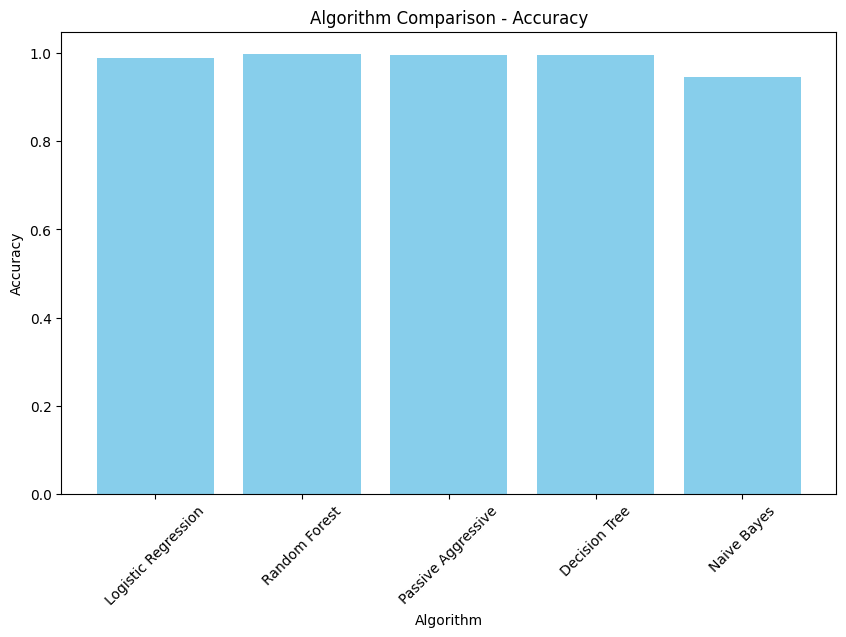

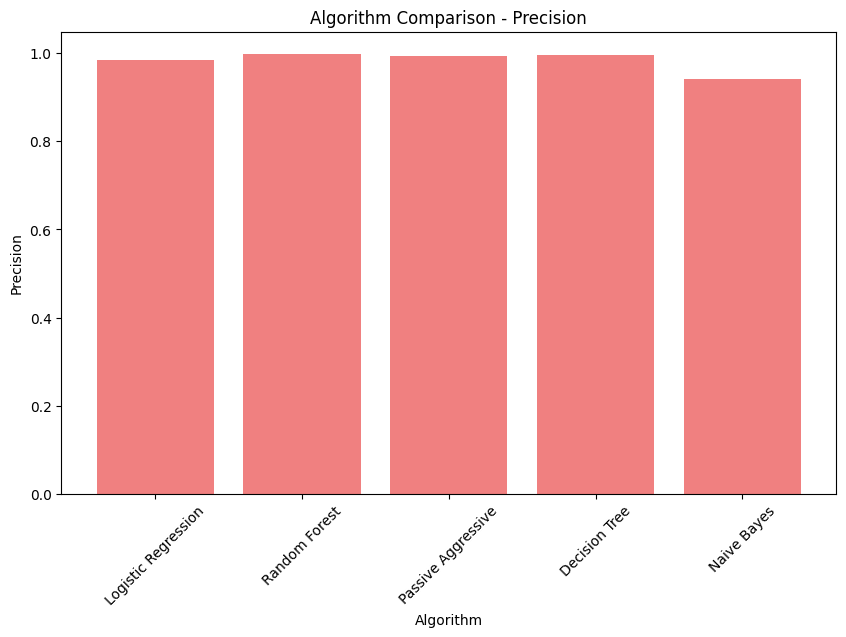

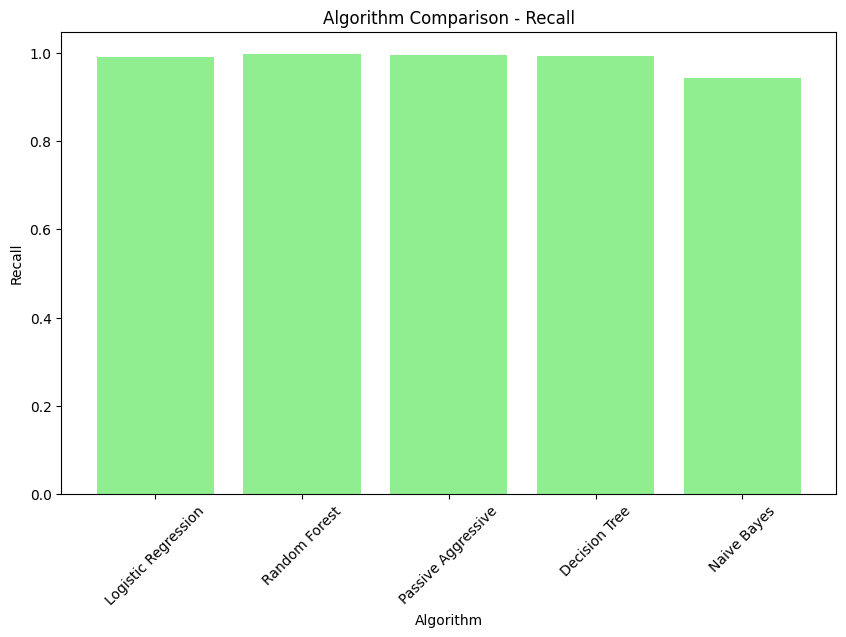

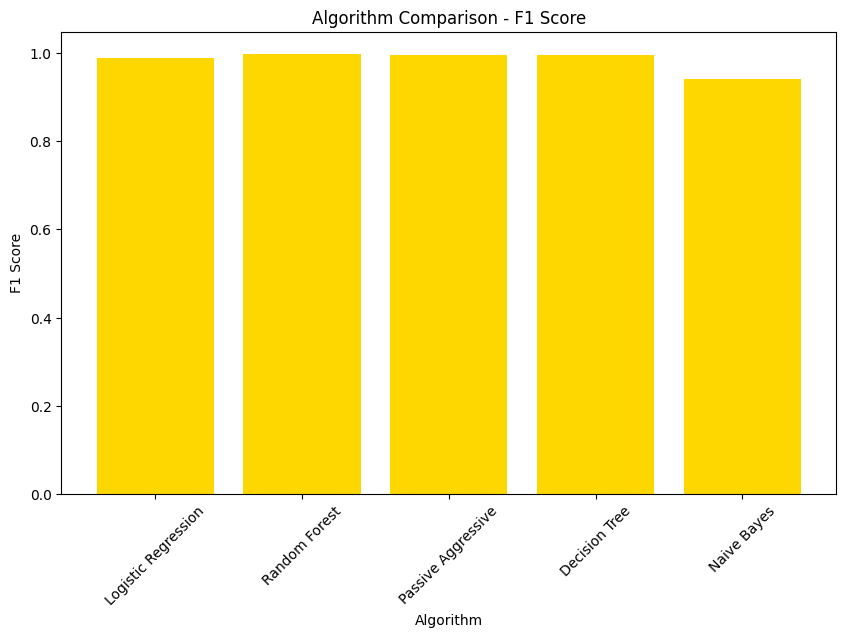

In [ ]:
# Define the algorithm names and their corresponding metrics
algorithms = ['Logistic Regression', 'Random Forest', 'Passive Aggressive', 'Decision Tree', 'Naive Bayes']
accuracies = [lr_accuracy, rf_accuracy, pa_accuracy, dt_accuracy, nb_accuracy]
precisions = [lr_test_precision, rf_test_precision, pa_test_precision, dt_test_precision, nb_test_precision]
recalls = [lr_test_recall, rf_test_recall, pa_test_recall, dt_test_recall, nb_test_recall]
f1_scores = [lr_test_f1, rf_test_f1, pa_test_f1, dt_test_f1, nb_test_f1]

# Create a bar chart for accuracy
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Algorithm Comparison - Accuracy')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart for precision
plt.figure(figsize=(10, 6))
plt.bar(algorithms, precisions, color='lightcoral')
plt.xlabel('Algorithm')
plt.ylabel('Precision')
plt.title('Algorithm Comparison - Precision')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart for recall
plt.figure(figsize=(10, 6))
plt.bar(algorithms, recalls, color='lightgreen')
plt.xlabel('Algorithm')
plt.ylabel('Recall')
plt.title('Algorithm Comparison - Recall')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart for F1 score
plt.figure(figsize=(10, 6))
plt.bar(algorithms, f1_scores, color='gold')
plt.xlabel('Algorithm')
plt.ylabel('F1 Score')
plt.title('Algorithm Comparison - F1 Score')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

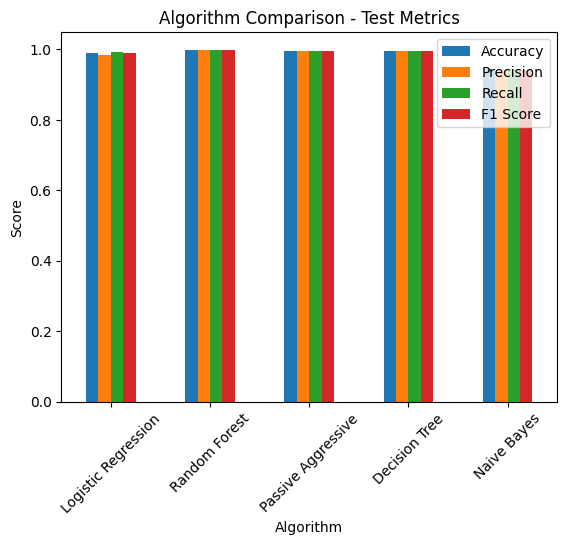

In [ ]:
# Define the algorithm names and their corresponding metrics
algorithms = ['Logistic Regression', 'Random Forest', 'Passive Aggressive', 'Decision Tree', 'Naive Bayes']
accuracy_scores = [lr_accuracy, rf_accuracy, pa_accuracy, dt_accuracy, nb_accuracy]
precision_scores = [lr_test_precision, rf_test_precision, pa_test_precision, dt_test_precision, nb_test_precision]
recall_scores = [lr_test_recall, rf_test_recall, pa_test_recall, dt_test_recall, nb_test_recall]
f1_scores = [lr_test_f1, rf_test_f1, pa_test_f1, dt_test_f1, nb_test_f1]

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Set the algorithm column as the index for plotting
results_df.set_index('Algorithm', inplace=True)

# Create a bar chart for all metrics
plt.figure(figsize=(12, 8))
results_df.plot(kind='bar', stacked=False)
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Algorithm Comparison - Test Metrics')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

In [ ]:
stop_words = set(stopwords.words('english'))

# Define a function for predicting titles
def predict_title(title_text):
    # Preprocess the title
    preprocessed_title_text = title_text.lower()
    preprocessed_title_text = nltk.word_tokenize(preprocessed_title_text)
    preprocessed_title_text = [word for word in preprocessed_title_text if word not in stop_words]

    # Convert the preprocessed text into TF-IDF vectors
    tfidf_vector = tfidf_vectorizer.transform([" ".join(preprocessed_title_text)])

    # Make the prediction
    prediction = naive_bayes_model.predict(tfidf_vector)

    return prediction

# Example titles
title_text_1 = "Donald Trump Sends Out Embarrassing New Year"
title_text_2 = "As U.S. budget fight looms, Republicans flip their fiscal script"

# Predict and display results for both titles
prediction_1 = predict_title(title_text_1)
prediction_2 = predict_title(title_text_2)

if prediction_1 == 1:
    print("Title 1: The news is likely true.")
else:
    print("Title 1: The news is likely false.")

if prediction_2 == 1:
    print("Title 2: The news is likely true.")
else:
    print("Title 2: The news is likely false.")

Title 1: The news is likely false.
Title 2: The news is likely true.
